# Part I - Ford GoBike System Data
## by Joy James

## Introduction
This dataset contains details about bike trips taken in the San Franciso bay area. Some of the trip details contained in this dataset include the trip duration, start and end time of the trip, start and end stations, etc. It also contains details about the riders such as birth year, gender and if the rider is a customer or subscriber.
<br>
The goal of this analysis is to explore the dataset and understand how the different variables interact with each other.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# read in dataset into pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv', encoding='latin-1')

# check the basic properties of the data
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.info())
df.head(10)

This dataset has 183412 rows and 16 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_y

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### What is the structure of your dataset?

This dataset has 183,412 rows and 16 columns. The first eleven columns speak to the timing, duration as well as start and end locations of the trip. The next column `bike_id` speaks to the bike used for the trip. The next three columns provide some insight to who the rider is. The information portrayed by last column `bike_share_for_all_trip` is not so clear and no proper explanation could be gotten from the data source.
### What is/are the main feature(s) of interest in your dataset?

* The main feature of interest in this dataset is the `duration_sec` column. We want to understand what factors influence how fast a rider completes a trip.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

* One feature that is likely to influence trip duration strongly is the **distance** between the start and end stations. Although there's no column describing distance, the distance can be calculated from the `longitude` and `latitude` columns of the start and end stations.
* Another feature that might help my investigation is the *time of the day* the trip was taken - was it in the early, mid or late hours of the day? This feature can be derived from the `start_time` column.
* The demographics of the rider too might affect trip duration i.e. **gender** and **age**. Men might ride faster than women. Also, younger riders might complete their rides in shorter periods. There is a gender column but the age column has to be derived from the `member_birth_year` column.

## Feature Engineering
Before we go on to the exploration, we will be creating the `distance`, `age` and `time_of_day` columns.

### Distance Calculator
To calculate distance from the longitude and latitude columns, we will be adopting a distance calculator function posted on the [Geeks for geeks](https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.) website. This calculator is based on the harvesine formula. Details about this formula can be found on the same website.

In [3]:
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)

In [4]:
df['distance'] = df.apply(lambda x: distance(x['start_station_latitude'], x['end_station_latitude'], x['start_station_longitude'], x['end_station_longitude']), axis=1)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.742999
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301


### Age Calculator

To calculate the age, we will be using the `start_time` and `end_time` columns to determine the year that this data was created.

In [5]:
date_cols = ['start_time','end_time']
df[date_cols].dtypes

start_time    object
end_time      object
dtype: object

The `start_time` and `end_time` columns need to be changed from object datatype to datetime so we can easily manipulate them

In [6]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [7]:
df[date_cols].dtypes

start_time    datetime64[ns]
end_time      datetime64[ns]
dtype: object

In [8]:
# check the year(s) the data set was created
df['start_time'].dt.year.value_counts()

2019    183412
Name: start_time, dtype: int64

In [9]:
# calculate the age of the riders and write it to a new column in the dataframe
df['age'] = 2019 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709,35.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.742999,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545,47.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739,30.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301,45.0


### Time of day derivator
To derive the time of day the trip started, we will bin the hours into six categories:
* early morning i.e. between 4 am and 8 am
* morning i.e. between 8 am and 12 noon
* mid-day i.e. between 12 noon and 4 pm
* evening i.e. between 4 pm and 8 pm
* night i.e. between 8 pm and 12 midnight
* late night i.e. between 12 midnight and 4am

In [10]:
# get the hour component of the start times
h = df['start_time'].dt.hour
# create bins and labels
b = [0,4,8,12,16,20,24]
l = ['late night','early morning','morning','mid-day','evening','night']
df['time_of_day'] = pd.cut(h, bins= b, labels= l, right = False)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,age,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.544709,35.0,evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.742999,NaN,evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.704545,47.0,mid-day
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.260739,30.0,evening
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.409301,45.0,night


In [11]:
# drop redundant columns
to_drop = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','member_birth_year']
df.drop(to_drop, axis= 1, inplace= True)
# write the new dataframe to a csv file
df.to_csv('edited_201902-fordgobike-tripdata.csv', index = False)

## Univariate Exploration


### How long does it take to complete most trips?
##### What is the distribution of the trip duration?

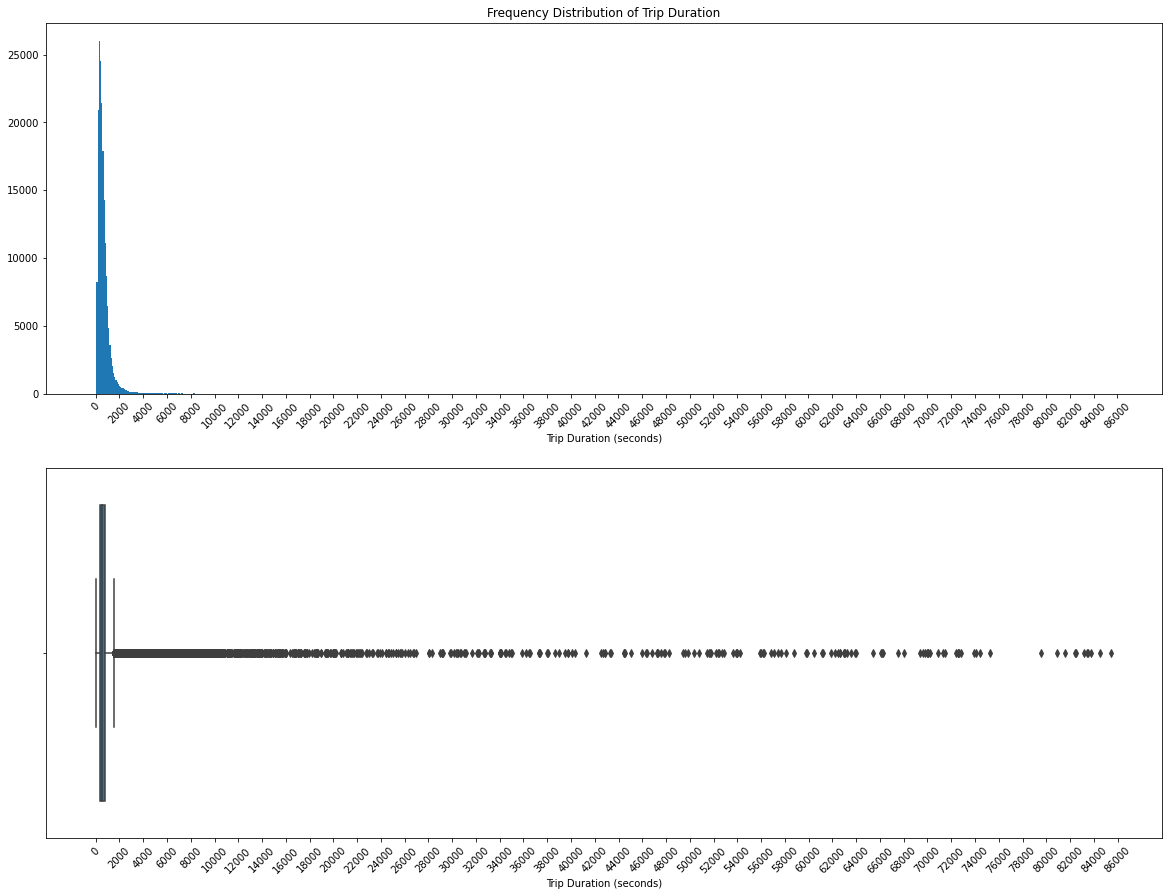

In [12]:
binsize = 100
bins = np.arange(df.duration_sec.min(), df.duration_sec.max() + binsize, binsize)
ticks = np.arange(0, df.duration_sec.max() +2000, 2000)
labels = [f'{x}' for x in ticks]

plt.figure(figsize=[20,15])
plt.subplot(2,1,1)
df['duration_sec'].hist(bins=bins, grid=False)
plt.xlabel('Trip Duration (seconds)')
plt.title('Frequency Distribution of Trip Duration')
plt.xticks(ticks, labels, rotation =45)

plt.subplot(2,1,2)
sb.boxplot(data = df, x= 'duration_sec')
plt.xticks(ticks, labels, rotation =45)
plt.xlabel('Trip Duration (seconds)');

Most of the trips are less than 2000 seconds long. However, there are a lot of outliers for this variable, as high as 86,000 seconds. Let's take a closer look at the observations with this outlier values and see if there is anything perculiar to them.

In [13]:
outliers = df['duration_sec'] > 4000
df.loc[outliers,:]

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,distance,age,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,0.544709,35.0,evening
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,No,1.742999,NaN,evening
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2.704545,47.0,mid-day
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,0.260739,30.0,evening
91,5621,2019-02-28 21:41:16.900,2019-02-28 23:14:58.186,252.0,Channing Way at Shattuck Ave,244.0,Shattuck Ave at Hearst Ave,5244,Subscriber,Female,No,0.875424,22.0,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182133,6086,2019-02-01 07:00:02.042,2019-02-01 08:41:28.251,380.0,Masonic Ave at Turk St,377.0,Fell St at Stanyan St,4956,Subscriber,Other,No,0.972744,48.0,early morning
182411,13609,2019-02-01 04:38:43.601,2019-02-01 08:25:33.493,106.0,Sanchez St at 17th St,79.0,7th St at Brannan St,4944,Subscriber,Male,Yes,2.632937,37.0,early morning
183215,17953,2019-02-01 01:39:13.098,2019-02-01 06:38:26.681,86.0,Market St at Dolores St,356.0,Valencia St at Clinton Park,2947,Customer,NaN,No,0.399314,NaN,late night
183306,13251,2019-02-01 01:03:11.362,2019-02-01 04:44:03.321,31.0,Raymond Kimbell Playground,13.0,Commercial St at Montgomery St,4889,Customer,NaN,No,3.011697,NaN,late night


The distance covered in these trips with long trip durations are relatively the same with trips with normal durations. A case in point is the very last trip recorded in this dataset. The duration is recorded as ***5,713 seconds*** but the distance covered is ***0 km***. It's possible that the bike was rented but the trip was never taken. Since we don't have more information to further investigate the outliers, we will be dropping them.

In [14]:
df = df.loc[~outliers,:]
df.shape

(181920, 14)

There are now 181,920 observations in this dataset. Let us replot the histogram and boxplot to reobserve the distribution.

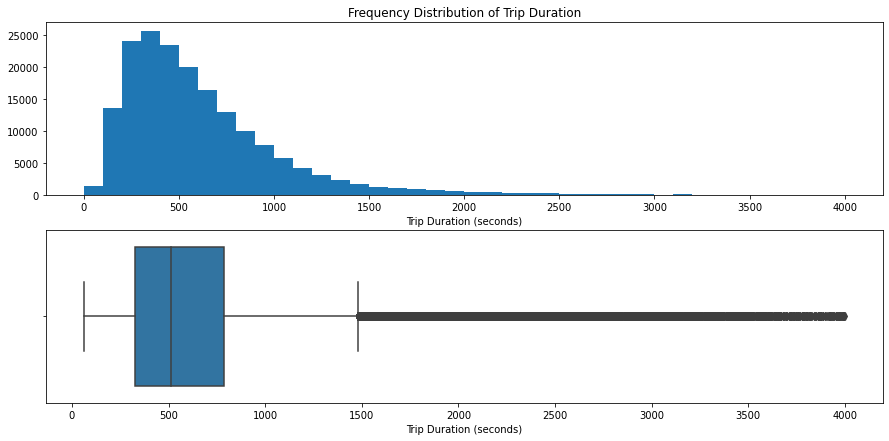

In [15]:
binsize = 100
bins = np.arange(0, df.duration_sec.max() + binsize, binsize)

plt.figure(figsize=[15,7])
plt.subplot(2,1,1)
df['duration_sec'].hist(bins=bins, grid=False)
plt.xlabel('Trip Duration (seconds)')
plt.title('Frequency Distribution of Trip Duration')

plt.subplot(2,1,2)
sb.boxplot(data = df, x= 'duration_sec')
plt.xlabel('Trip Duration (seconds)');

The length of the bike trips range from a little above 0 to 1500 seconds. Most of these trips are between 300 to 800 seconds long. Although there are still some outliers, the distribution of the trip duration can now be clearly seen. The following can be observed from the charts plotted:
* The distribution is a long tail distribution. Applying a log transform should help convert it to a normal distribution
* The median is greater than the mean which is common to long tail distributions

In [16]:
np.log10(df.duration_sec.describe())

count    5.259880
mean     2.797599
std      2.664891
min      1.785330
25%      2.510545
50%      2.708421
75%      2.895423
max      3.601951
Name: duration_sec, dtype: float64

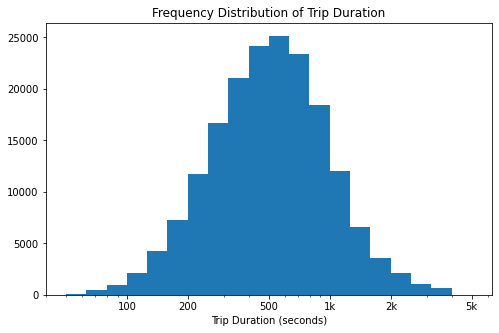

In [17]:
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(df.duration_sec.max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
df['duration_sec'].hist(bins=bins, grid=False)
plt.xscale('log')
plt.xticks([100, 200, 500, 1000, 2000, 5000], [100, 200, 500, '1k', '2k', '5k'])
plt.xlabel('Trip Duration (seconds)')
plt.title('Frequency Distribution of Trip Duration');

Now that it has been log transformed, we can see that the trip duration peaks at about 500 seconds long. Also, the distribution is unimodal.

### How much distance is covered in most trips?
##### What is the distribution of the distance covered during the trips?

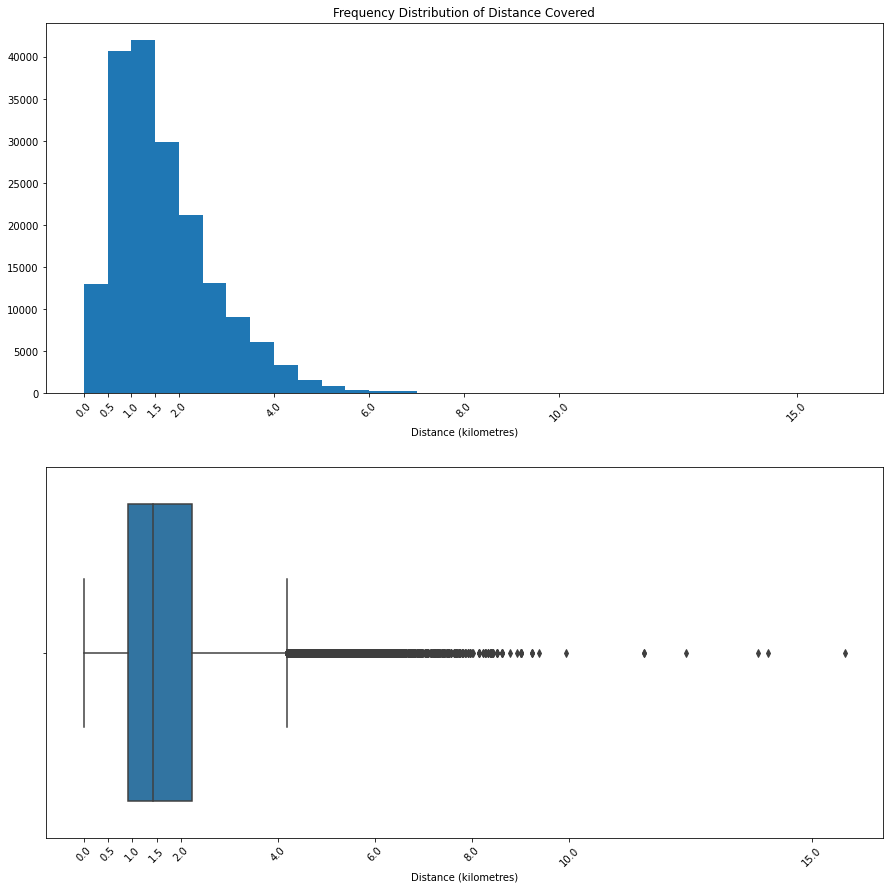

In [18]:
binsize = 0.5
bins = np.arange(df.distance.min(), df.distance.max() + binsize, binsize)
ticks = np.arange(0, df.distance.max() +0.5, 0.5)
ticks = [0,0.5,1,1.5,2,4,6,8,10,15]

plt.figure(figsize=[15,15])
plt.subplot(2,1,1)
df['distance'].hist(bins=bins, grid=False)
plt.xticks(ticks, rotation =45)
plt.xlabel('Distance (kilometres)')
plt.title('Frequency Distribution of Distance Covered')

plt.subplot(2,1,2)
sb.boxplot(data = df, x= 'distance')
plt.xticks(ticks, rotation =45)
plt.xlabel('Distance (kilometres)');

From the visual above, it can be seen that the distance covered ranges from 0 to about 4km. Most times, the trips are about 0.5 to 1.5km long. Also, we see that the distribution is long tail and has some outliers. We will apply a log transformation to the data since it is skewed to the right.

In [19]:
np.log10(df.distance.describe())

c:\Users\Owner\anaconda3\envs\complaints\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.259880
mean     0.228342
std      0.034226
min          -inf
25%     -0.038518
50%      0.156086
75%      0.347464
max      1.195179
Name: distance, dtype: float64

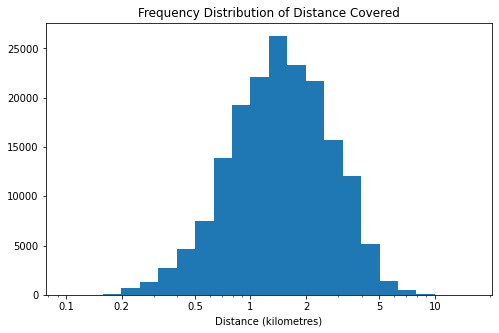

In [20]:
log_binsize = 0.1
bins = 10 ** np.arange(-1, np.log10(df.distance.max())+log_binsize, log_binsize)
ticks = [0.1, 0.2, 0.5, 1, 2, 5, 10]
labels = [f'{x}' for x in ticks]

plt.figure(figsize=[8, 5])
df['distance'].hist(bins=bins, grid=False)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Distance (kilometres)')
plt.title('Frequency Distribution of Distance Covered');

After applying a logarithmic transformation, the distribution is slightly skewed left. It is also unimodal, peaking at about 1 to 2 kilometers.

### What time of the day do people take bike trips?

Since there's some order to the different times of the day, we will change the datatype of the `time_of_day` column before we proceed with our analysis.

In [21]:
# change data type of time_of_day column to category
time_order = ['early morning','morning','mid-day','evening','night','late night']
ordered_time = pd.api.types.CategoricalDtype(ordered = True,categories = time_order)
df.time_of_day = df.time_of_day.astype(ordered_time)

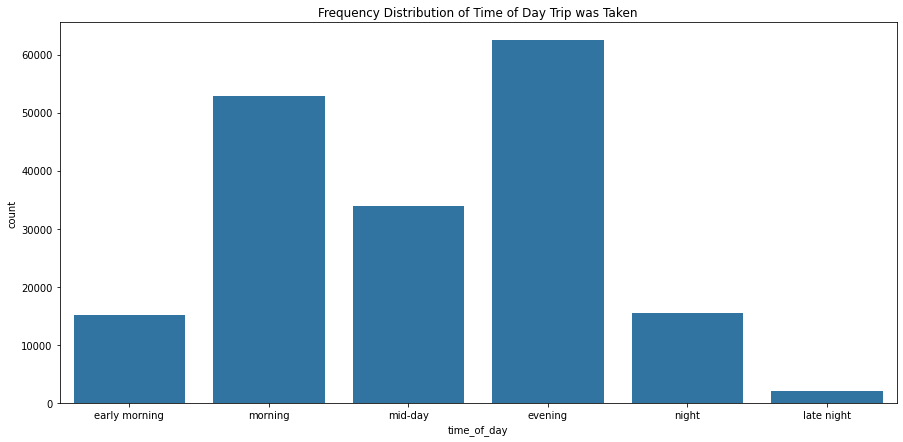

In [22]:
# get a base color so as to reduce noise in plotting
base_color = sb.color_palette()[0]
# plot a barchart showing the frequency distribution of this variable
plt.figure(figsize=[15,7])
sb.countplot(data=df, x='time_of_day', color = base_color)
plt.title('Frequency Distribution of Time of Day Trip was Taken');

From the graph above, it is seen that people would rather take their trips in the evening or morning. Fewer people take trips at mid day and even fewer people ride at night or early in the morning.

### How old are the people who take bike trips?
##### What is the age distribution?

In [23]:
df.age.describe()

count    173947.000000
mean         34.188862
std          10.115142
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

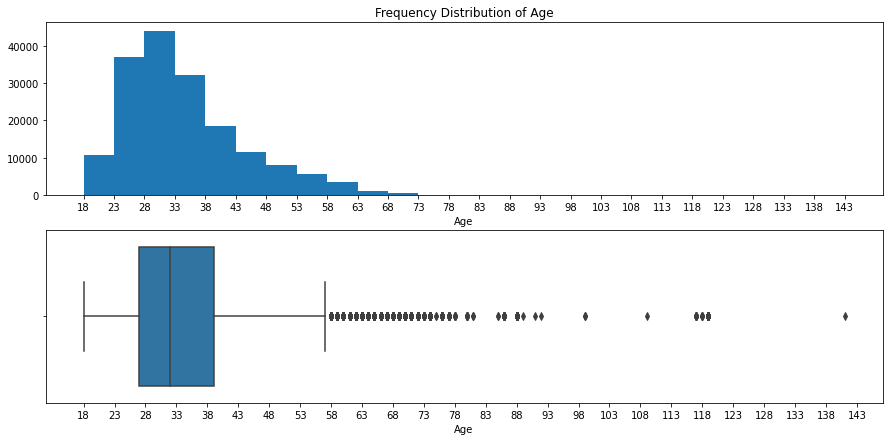

In [24]:
binsize = 5
bins = np.arange(df.age.min(), df.age.max() + binsize, binsize)

plt.figure(figsize=[15,7])
plt.subplot(2,1,1)
df['age'].hist(bins=bins, grid=False)
plt.xticks(bins)
plt.xlabel('Age')
plt.title('Frequency Distribution of Age')

plt.subplot(2,1,2)
sb.boxplot(data = df, x= 'age')
plt.xticks(bins)
plt.xlabel('Age');

The people who ride these bikes range from 18 to 57 years old. Most of the riders are aged between 30 and 33 years old. A few of them are above 57 but they are considered outliers compared to the rest of the riders. To exclude the outliers, we will limit the x-axis

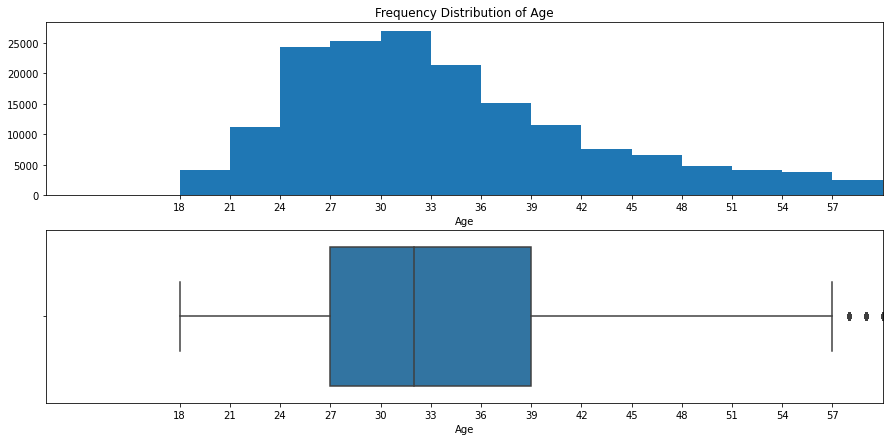

In [25]:
binsize = 3
bins = np.arange(df.age.min(), df.age.max() + binsize, binsize)
ticks = np.arange(18, 60, 3)
labels = [f'{x}' for x in ticks]

plt.figure(figsize=[15,7])
plt.subplot(2,1,1)
df['age'].hist(bins=bins, grid=False)
plt.xlim(10,60)
plt.xticks(ticks, labels)
plt.xlabel('Age')
plt.title('Frequency Distribution of Age')

plt.subplot(2,1,2)
sb.boxplot(data = df, x= 'age')
plt.xlim(10,60)
plt.xticks(ticks, labels)
plt.xlabel('Age');

After limiting the x-axis, we can see that the distribution is right skewed and might need to be log transformed to get a normal distribution.

In [26]:
np.log10(df.age.describe())

count    5.240417
mean     1.533885
std      1.004972
min      1.255273
25%      1.431364
50%      1.505150
75%      1.591065
max      2.149219
Name: age, dtype: float64

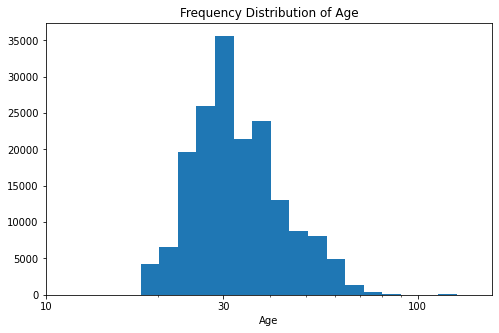

In [27]:
log_binsize = 0.05
bins = 10 ** np.arange(np.log10(df.age.min()), np.log10(df.age.max())+log_binsize, log_binsize)
ticks = [10, 30, 100]
labels = [f'{x}' for x in ticks]

plt.figure(figsize=[8, 5])
df['age'].hist(bins=bins, grid=False)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Age')
plt.title('Frequency Distribution of Age');

Even after the transformation, the distribution is still skewed to the right and most of the ages are around 30. 

### What is the gender distribution of the people who take bike trips?

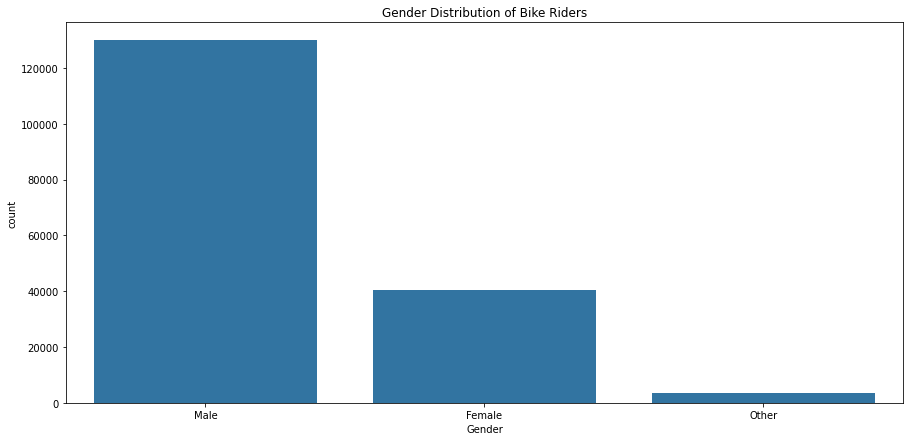

In [28]:
# plot a barchart showing the frequency distribution of this variable
plt.figure(figsize=[15,7])
sb.countplot(data=df, x='member_gender', color = base_color)
plt.xlabel('Gender')
plt.title('Gender Distribution of Bike Riders');

From the chart above, we see that the proportion of male riders is significantly larger than that of any other gender category.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?



While exploring the distribution of trip durations, I observed that some trips were unusually long - about 84,000 seconds long. I dropped all the trips that were more than 4000 seconds long. A similar trend was observed for the age distribution and outliers were also excluded from the analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

All the numerical variables explored i.e. trip duration, distance and age all had long tail distributions and had to be log transformed. Also, before starting the univariate exploration, some new features such as distance, age and time of day were derived from the original data provided. The data type of one of the new variables derived (`time_of_day`) was also changed from string to an ordered category. This was done so that the inherent order of the variable can be retained when plotting the graph.

## Bivariate Exploration


### How does the trip duration vary with the distance covered?

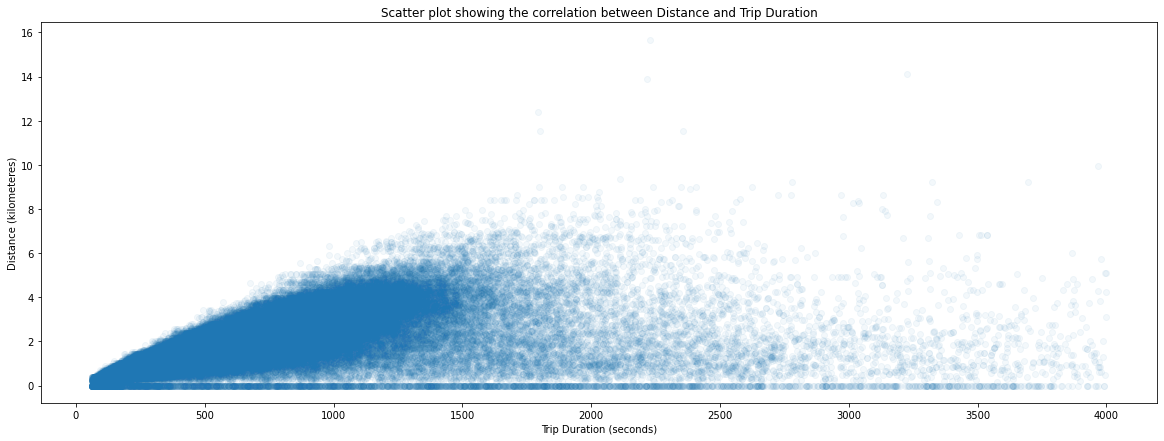

In [29]:
plt.figure(figsize=[20,7])
plt.scatter(x='duration_sec', y='distance', data=df, alpha = 1/20)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Distance (kilometeres)')
plt.title('Scatter plot showing the correlation between Distance and Trip Duration');

From the chart above, it can be observed that there is a weak positive correlation between distance and trip duration. There seems to be a straight line at 0km indicating that there are a couple of riders who rented bikes but never left the station. The outliers are also visible in this plot.

### How does the time of the day affect the trip duration?

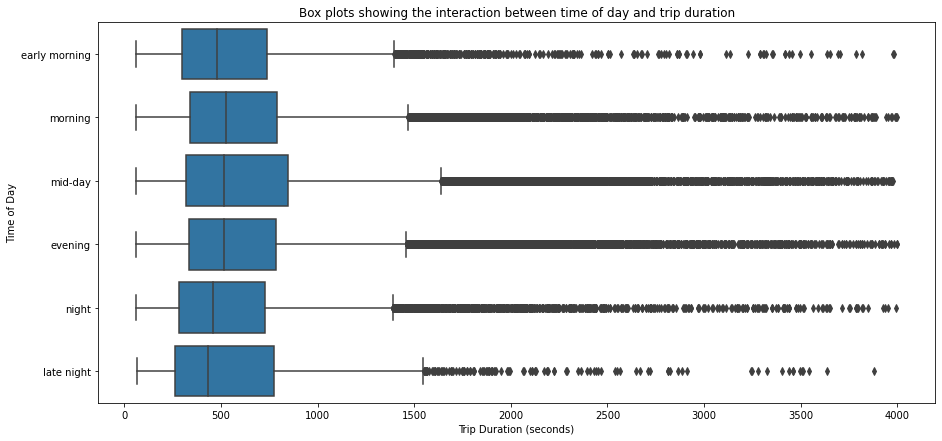

In [30]:
plt.figure(figsize=[15,7])
sb.boxplot(x='duration_sec', y='time_of_day', data=df, color=base_color)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Time of Day')
plt.title('Box plots showing the interaction between time of day and trip duration');

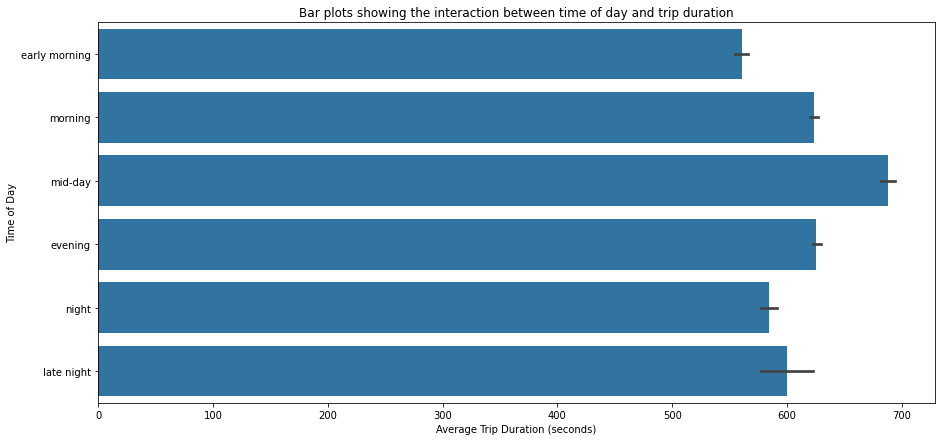

In [31]:
plt.figure(figsize=[15,7])
sb.barplot(x='duration_sec', y='time_of_day', data=df, color=base_color)
plt.xlabel('Average Trip Duration (seconds)')
plt.ylabel('Time of Day')
plt.title('Bar plots showing the interaction between time of day and trip duration');

From the charts above, it can be seen that trips taken between morning and evening have a higher trip duration mean, median and range than the rest of the group. This indicates that people spend more time riding while the sun is still out. It could be because they tend to take trips to farther destinations during the day. This will further be investigated in the multivariate exploration part of this project. It can also be observed that the duration of trips taken at late night tend to vary a lot.

### Does age affect the duration of the trip?

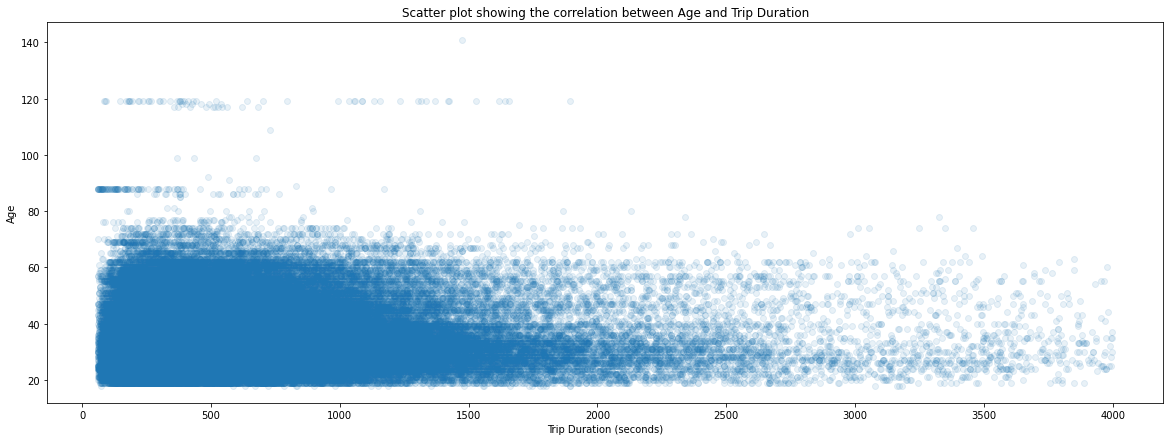

In [32]:
plt.figure(figsize=[20,7])
plt.scatter(x='duration_sec', y='age', data=df, alpha = 1/10)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Age')
plt.title('Scatter plot showing the correlation between Age and Trip Duration');

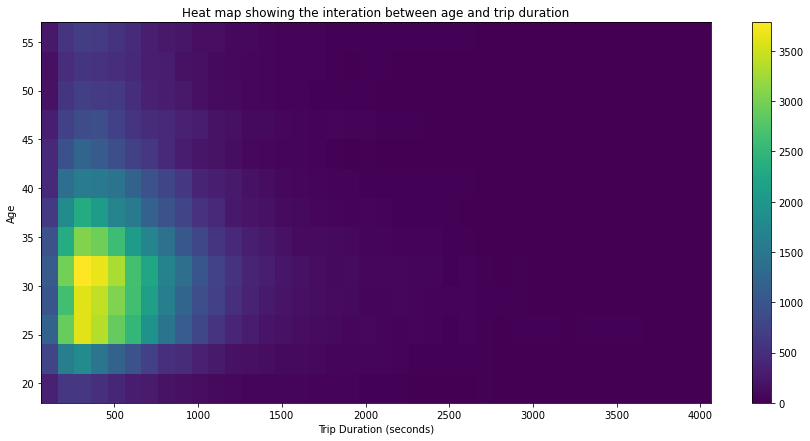

In [33]:
plt.figure(figsize=[15,7])
bins_x = np.arange(61, df.duration_sec.max() + 100, 100)
bins_y = np.arange(18, 60, 3)
plt.hist2d(x = df.duration_sec, y = df.age, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Age')
plt.title('Heat map showing the interation between age and trip duration');

The charts above show that there is a weak correlation between age and trip duration. Riders aged between 25 and 35 years that have taken trips between 200 and 600 seconds long are the most in this dataset.

### How does trip duration vary with gender?

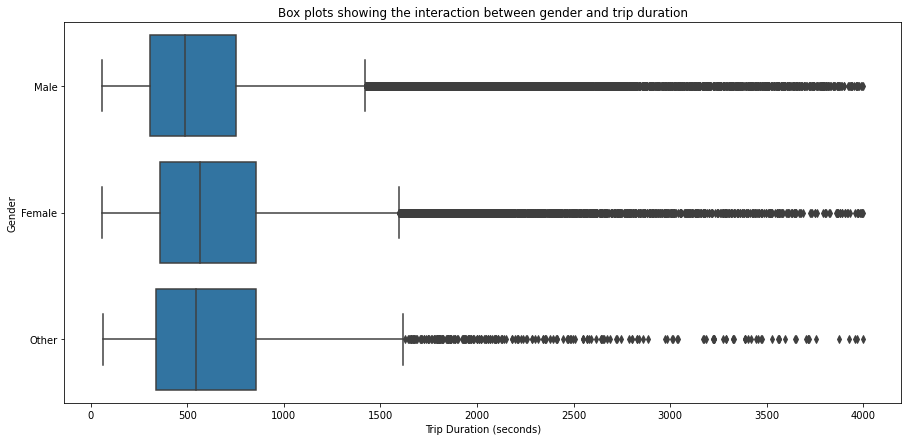

In [34]:
# plotting a boxplot to show the interaction
plt.figure(figsize=[15,7])
sb.boxplot(x='duration_sec', y='member_gender', data=df, color=base_color)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Gender')
plt.title('Box plots showing the interaction between gender and trip duration');


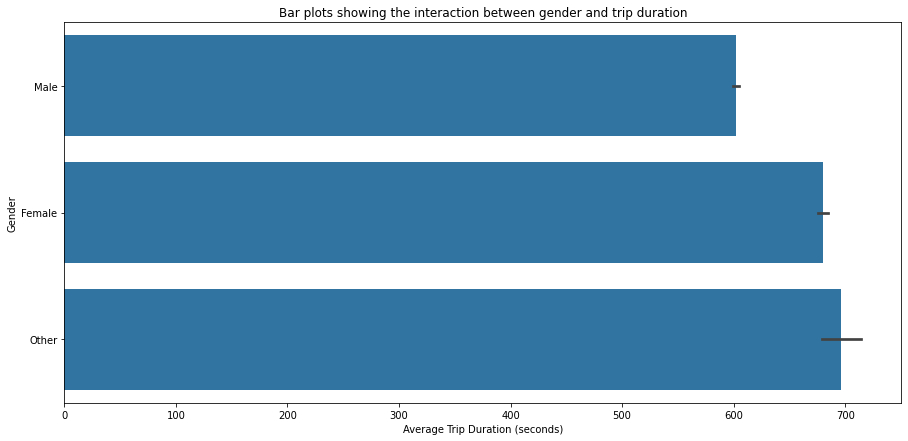

In [35]:
# plotting a barplot to show the interaction
plt.figure(figsize=[15,7])
sb.barplot(x='duration_sec', y='member_gender', data=df, color=base_color)
plt.xlabel('Average Trip Duration (seconds)')
plt.ylabel('Gender')
plt.title('Bar plots showing the interaction between gender and trip duration');

Even though there are more male riders (as seen in the univariate analysis), they tend to take shorter trips compared to the other gender categories.

### Do the different gender categories have different preferred times to take bike trips?

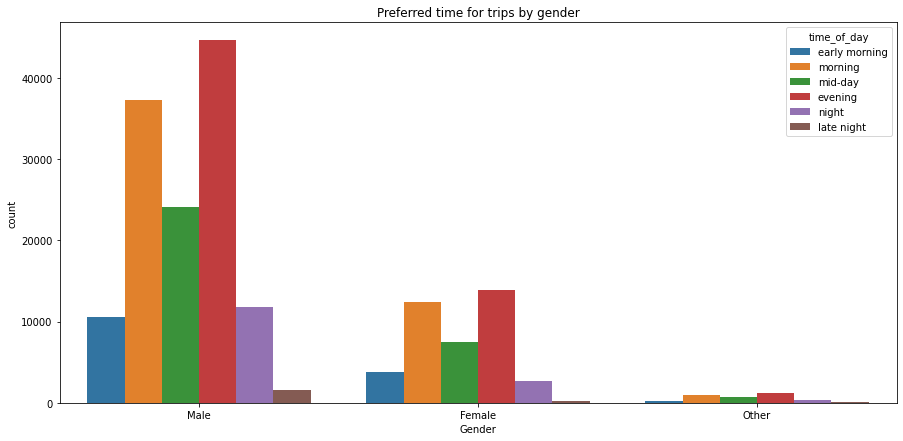

In [36]:
plt.figure(figsize=[15,7])
sb.countplot(data=df, x ='member_gender', hue='time_of_day')
plt.xlabel('Gender')
plt.title('Preferred time for trips by gender');

The three gender categories follow similar patterns in preferred times to ride the bikes. Asides the general pattern of riding between the morning and evening, the female gender prefer to take early mornig rides to riding at night.

### Is there any interaction with age and the time of day the trip was taken?

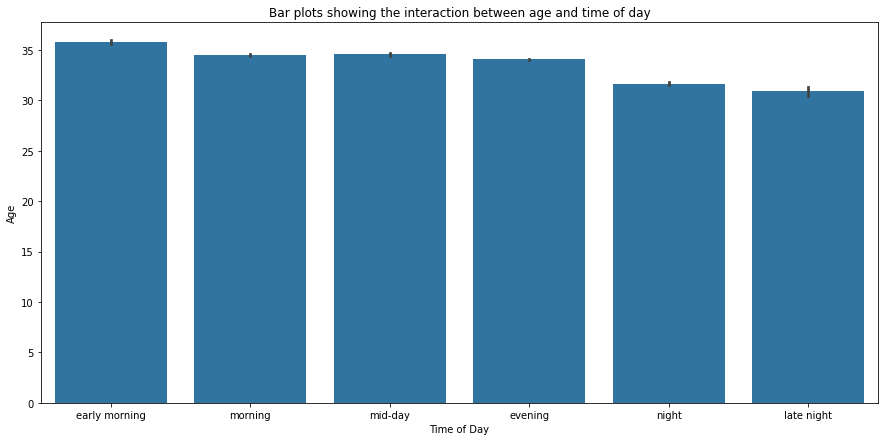

In [37]:
# plotting a barplot to show the interaction
plt.figure(figsize=[15,7])
sb.barplot(x='time_of_day', y='age', data=df, color=base_color)
plt.xlabel('Time of Day')
plt.ylabel('Age')
plt.title('Bar plots showing the interaction between age and time of day');

There doesn't seem to be any interaction with age and time of day. The average age for each time/period is still between 30 and 35 years old.

### Does the average distance covered vary with the time the trip was taken?

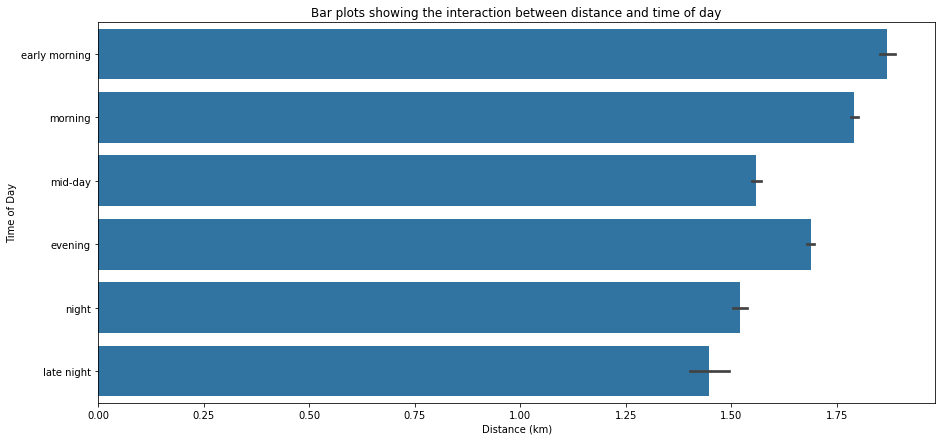

In [38]:
# plotting a barplot to show the interaction
plt.figure(figsize=[15,7])
sb.barplot(x='distance', y='time_of_day', data=df, color=base_color)
plt.xlabel('Distance (km)')
plt.ylabel('Time of Day')
plt.title('Bar plots showing the interaction between distance and time of day');

In [39]:
df.groupby('time_of_day')['distance'].mean()

time_of_day
early morning    1.868162
morning          1.791114
mid-day          1.558667
evening          1.687668
night            1.520247
late night       1.447001
Name: distance, dtype: float64

The riders cover longer distances in the morning and evening. This could be because the heat from the sun is less during those times. But this observation is also contrary to what I expected i.e. longer distances being covered in mid-day, longer trips (in terms of distance) are taken in the morning or evening. Do people take longer time to cover shorter trips during the day because they run errands or run into more traffic?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Having explored the realtionship between independent variables such as `distance`, `age`, `gender`, `time_of_day` and the dependent variable `duration_sec`, the following can be observed:
1. Trip duration has a weak correlation with the distance covered
2. Riders tend to take longer trips in the morning, mid-day and evening. The longest trips are taken at mid-day.
3. Male riders take shorter trips compared to the other gender categories.
4. There is little or no correlation between trip duration and age.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

In addition to looking at the relationship between the trip duration and other variables, I looked at how other variables interacted with each other and the following was observed:
1. All gender categories have similar preferred times to take their trips.
2. I also explored the relationship between age and time of day but no relationship was found.
3. Looking at the average distance covered at the different times of the day, it was observed that people covered longer distances in the mornings or evenings.

## Multivariate Exploration


### How does trip distance and duration vary with the time the trip was taken?

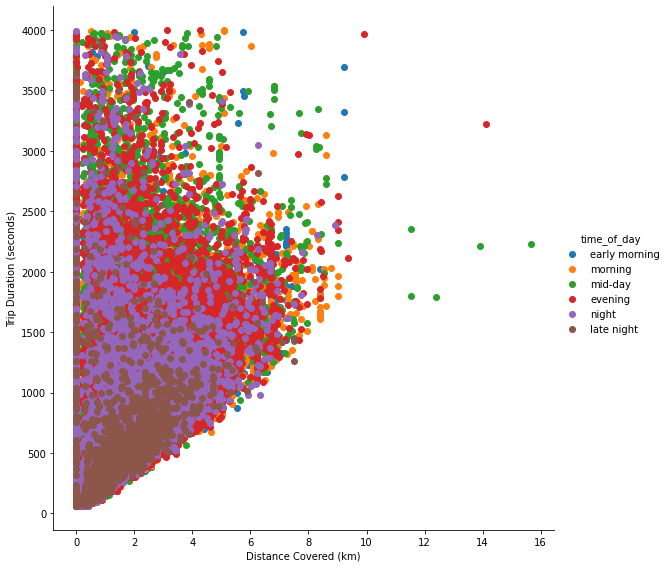

In [40]:
g = sb.FacetGrid(data = df, hue = 'time_of_day', height = 8)
g.map(plt.scatter, 'distance','duration_sec')
g.add_legend()
g.set_xlabels('Distance Covered (km)')
g.set_ylabels('Trip Duration (seconds)');

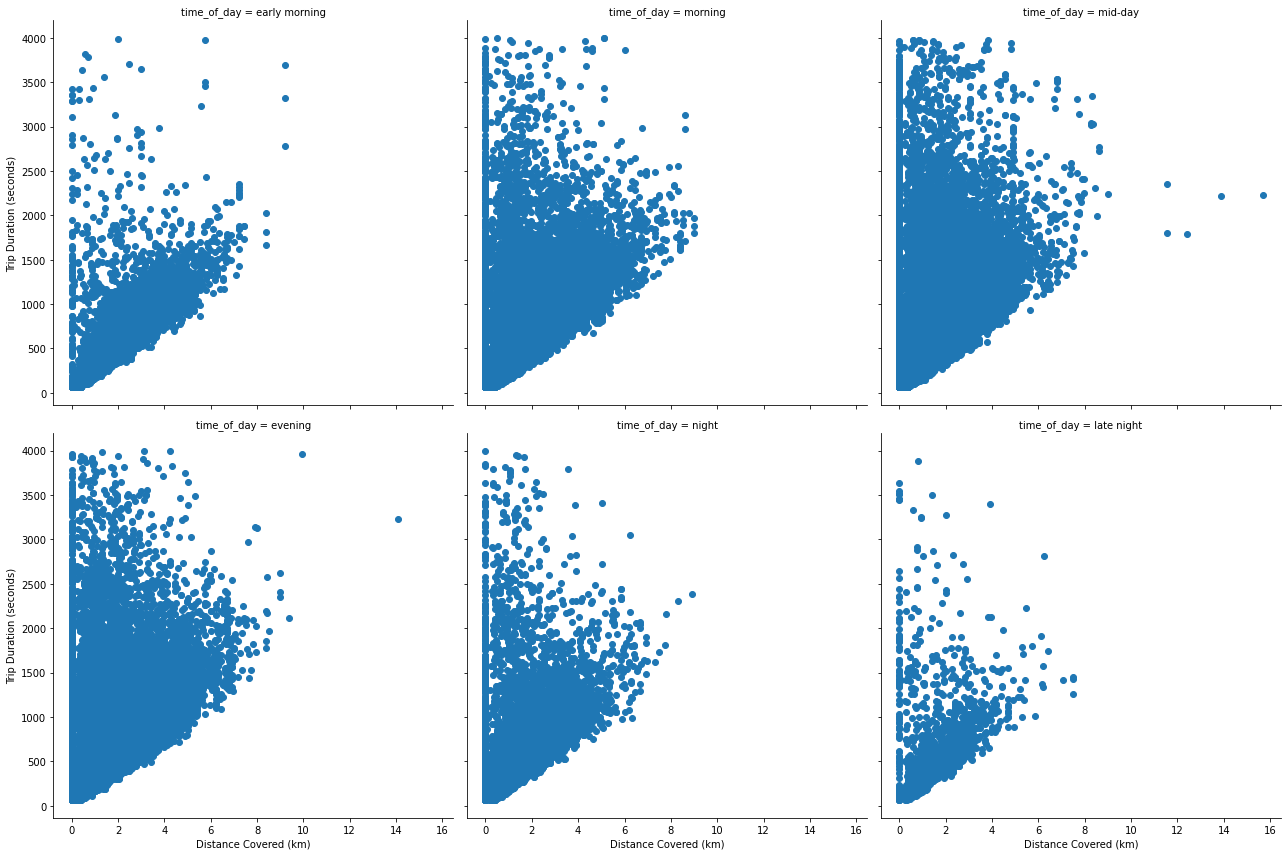

In [41]:
g = sb.FacetGrid(data = df, col = 'time_of_day', col_wrap= 3, height = 6)
g.map(plt.scatter, 'distance','duration_sec')
g.set_xlabels("Distance Covered (km)")
g.set_ylabels("Trip Duration (seconds)");

The correlation between distance and duration is approximately the same for all times of the day. However, as the day progresses to the evening, more time is taken to cover the same distance. But as night comes, the duration decreases for the same distance.

### How does gender affect the relationship between trip duration and distance?

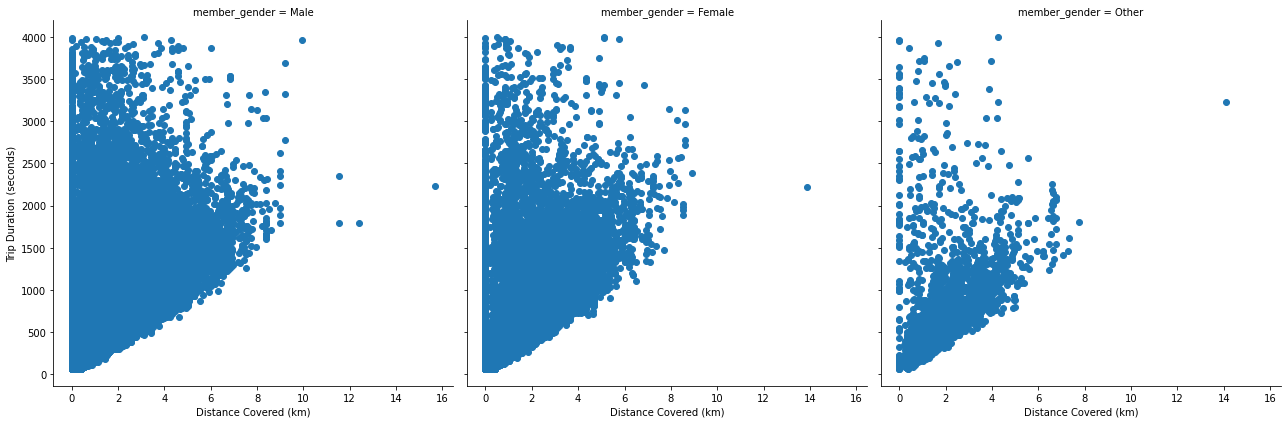

In [42]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 6)
g.map(plt.scatter, 'distance','duration_sec')
g.set_xlabels("Distance Covered (km)")
g.set_ylabels("Trip Duration (seconds)");

In [43]:
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(df.distance.min(), df.distance.max() + 0.5, 0.5)
    bins_y = np.arange(61, df.duration_sec.max() + 100, 100)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)
    plt.colorbar()

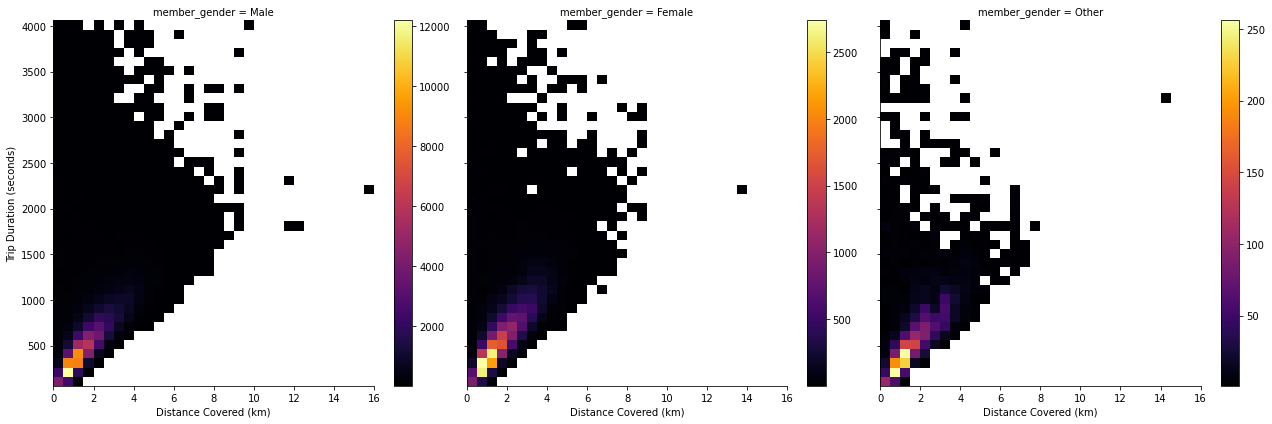

In [44]:
g = sb.FacetGrid(data = df, col = 'member_gender', height = 6)
g.map(hist2dgrid, 'distance', 'duration_sec', color = 'inferno')
g.set_xlabels("Distance Covered (km)")
g.set_ylabels("Trip Duration (seconds)");

The pattern for the interaction between distance and duration is the same across the different gender categories.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


Looking at the distance covered, time of the day the trip started and how long the trip took, the time taken to cover the same distance increases as the day progresses. However, as the night draws, the time taken reduces.



### Were there any interesting or surprising interactions between features?


I would have expected that longer distances were covered at mid-day but this was not so from the data. Also, I expected that the distance covered will vary with the age or gender or both of the riders but none of these demographics significantly affect trip duration or trip distance.

## Conclusions

In this project, we have explored the Ford GoBikeSharing dataset for February 2019. The main feature of interest was the trip duration. Other features observed were trip distance, the time of day the trip was taken, age and gender of the riders. Although some of these features were not provided originally in the dataset, featur engineering was done so we could extract the insights more easily.
<br>
After carrying out univariate, bivariate and multivariate exploration of this data, the following was observed:
1. A normal trip is about 0 to 1500 seconds long i.e. 0 - 25 minutes although most of them are about 8 minutes long.
2. Riders cover up to 4 kilometers on these trips but most trips are between 1 to 2 kilometers long.
3. Most riders prefer to ride in the evening compared to any other time of the day.
4. Most of the riders are male and most of them are aged around 30 years old.
5. As expected, the distance covered correlates positively with trip duration. However, this is weaker than expected.
6. The age and gender of the riders have little or no relationship with the trip duration.
7. The time of day the trip starts significantly impacts the duration and distance covered during the trip.
<br>
<br>
In conclusion, the distance to be covered during the trip and time of the day the trip is to be taken significantly affects how long the trip will be.